# Usando Google Maps para prdecir crimenes

**Ciudad : San Franscisco**

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
# librerias

import numpy as np 
import pandas as pd 
import datetime
import urllib
import matplotlib.pyplot as plt

In [3]:
## Datos de crimenes
#df_raw=pd.read_csv('https://data.sfgov.org/api/views/q6gg-sa2p/rows.csv?accessType=DOWNLOAD')
df_raw=pd.read_csv('data/raw_data_crimes.csv')
df_raw.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,"(37.7196874952717, -122.476327815126)"
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,"(37.7812707434494, -122.411339562557)"
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,"(37.7626702770872, -122.435187699349)"
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,"(37.7649178909424, -122.421886357981)"
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,"(37.7516932889916, -122.413935404044)"


In [4]:
#df_raw.to_csv('data/raw_data_crimes.csv', index=False)

In [5]:
df_raw.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

In [6]:
df_raw.shape

(2215024, 12)

In [7]:
df_raw.isna().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
dtype: int64

In [8]:
df_raw.describe()

,IncidntNum,X,Y
count,2.215024e+06,2.215024e+06,2.215024e+06
mean,1.040728e+08,-1.224229e+02,3.777076e+01
std,4.612827e+07,2.983459e-02,4.203596e-01
min,3.979000e+03,-1.225136e+02,3.770788e+01
25%,6.124170e+07,-1.224332e+02,3.775302e+01
50%,1.011558e+08,-1.224166e+02,3.777542e+01
75%,1.409256e+08,-1.224069e+02,3.778448e+01
max,9.915824e+08,-1.205000e+02,9.000000e+01


In [9]:
df_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 12 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4 GB


In [10]:
# seleccion y limpieza de datos

df=df_raw[['Category', 'DayOfWeek', 'Date', 'Time', 'X', 'Y']]
df.columns=['Category', 'DayOfWeek', 'Date', 'Time', 'Longitude', 'Latitude']

df=df.dropna()
df.head()

,Category,DayOfWeek,Date,Time,Longitude,Latitude
0,MISSING PERSON,Friday,04/15/2011,16:00,-122.476328,37.719687
1,WARRANTS,Thursday,03/26/2009,12:28,-122.411340,37.781271
2,SECONDARY CODES,Friday,02/15/2013,02:00,-122.435188,37.762670
3,OTHER OFFENSES,Tuesday,01/15/2008,20:13,-122.421886,37.764918
4,SECONDARY CODES,Saturday,05/26/2007,18:10,-122.413935,37.751693


In [11]:
# exploracion

df.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [12]:
df.head()

,Category,DayOfWeek,Date,Time,Longitude,Latitude
0,MISSING PERSON,Friday,04/15/2011,16:00,-122.476328,37.719687
1,WARRANTS,Thursday,03/26/2009,12:28,-122.411340,37.781271
2,SECONDARY CODES,Friday,02/15/2013,02:00,-122.435188,37.762670
3,OTHER OFFENSES,Tuesday,01/15/2008,20:13,-122.421886,37.764918
4,SECONDARY CODES,Saturday,05/26/2007,18:10,-122.413935,37.751693


### Reclasificacion en 4 grupos

In [13]:
# grupos por tipos
THEFT=['LARCENY/THEFT', 'VEHICLE THEFT', 'BURGLARY', 'ROBBERY', 'STOLEN PROPERTY']


IMPAIRED=['DRUNKENNESS', 'DRIVING UNDER THE INFLUENCE', 'LIQUOR LAWS', 
          'DISORDERLY CONDUCT', 'DRUG/NARCOTIC', 'LOITERING']


VIOLENCE=['ASSAULT', 'VANDALISM', 'SUSPICIOUS OCC', 'TRESPASS', 'SEX OFFENSES, FORCIBLE' , 
          'SEX OFFENSES, NON FORCIBLE'] 


OTHER=['OTHER OFFENSES', 'NON-CRIMINAL']

In [14]:
CATEGORIAS=THEFT+IMPAIRED+VIOLENCE+OTHER


df=df[df.Category.isin(CATEGORIAS)] 

In [15]:
# creacion de nuevos supergrupos

selecciones=[(df.Category.isin(THEFT)), (df.Category.isin(IMPAIRED)),
             (df.Category.isin(VIOLENCE)), (df.Category.isin(OTHER))] 


nuevas_cat=['THEFT', 'IMPAIRED', 'VIOLENCE', 'OTHER']


df['CAT']=np.select(selecciones, nuevas_cat, default='OTHER')


df.CAT.value_counts()

THEFT       766351
OTHER       547681
VIOLENCE    422819
IMPAIRED    151679
Name: CAT, dtype: int64

## Plots

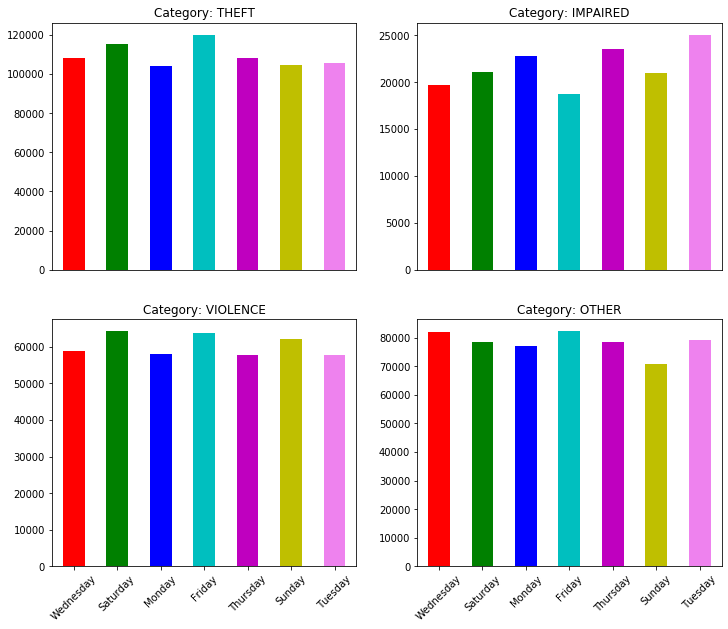

In [33]:
# por dia de la semana

plt.figure(figsize=(12,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    df_tmp=df[df.CAT==nuevas_cat[i-1]]
    df_tmp.DayOfWeek.value_counts(sort=False).plot(kind='bar', color=['r','g','b','c','m','y','violet'])
    plt.title('Category: {}'.format(nuevas_cat[i-1]))
    if i<=2:
        plt.xticks([])
    else:
        plt.xticks(rotation=45)

In [34]:
# dia del mes

df['Day_of_month']=[int(e.split('/')[1]) for e in df.Date]

df['Month_of_year']=[int(e.split('/')[0]) for e in df.Date]

df_por_mes=pd.DataFrame(df.Month_of_year.value_counts())
df_por_mes=df_por_mes.sort_index()
df_por_mes

,Month_of_year
1,167666
2,151502
3,168126
4,161556
5,159885
6,148957
7,155609
8,160499
9,156831
10,162538


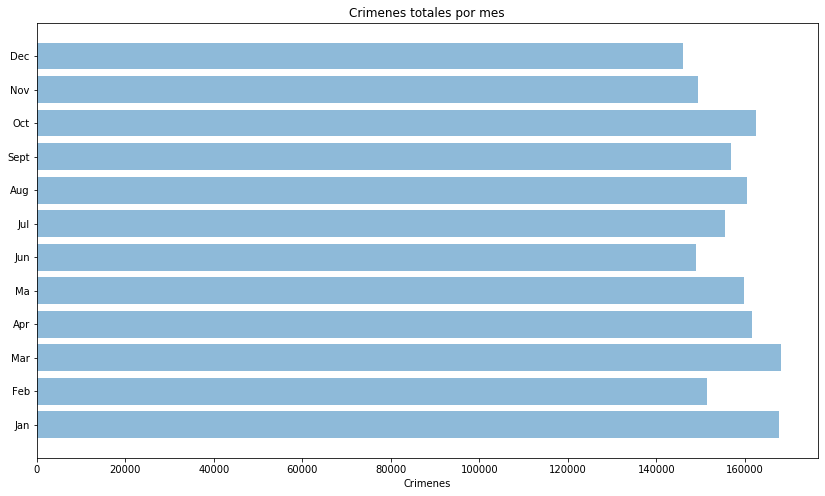

In [41]:
meses=['Jan','Feb','Mar','Apr','Ma','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

plt.figure(figsize=(14,8))
plt.barh(df_por_mes.index, df_por_mes.Month_of_year, align='center', alpha=0.5)
plt.yticks(df_por_mes.index, meses)
plt.xlabel('Crimenes')
plt.title('Crimenes totales por mes');

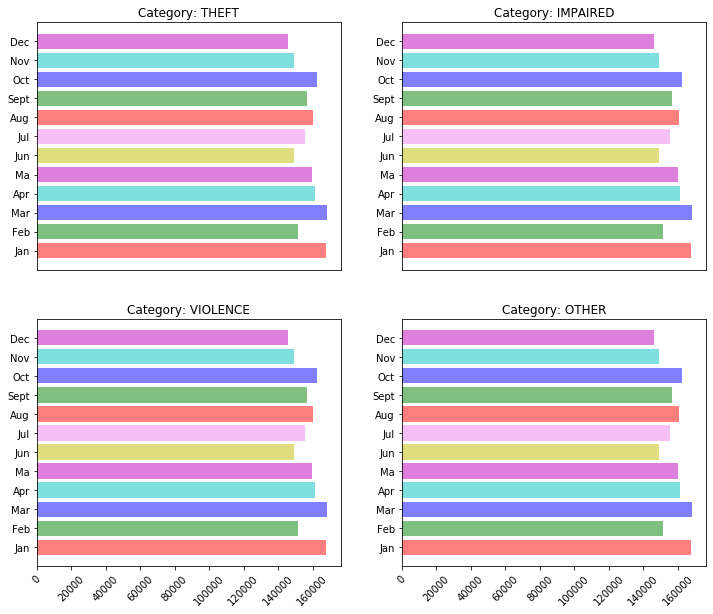

In [49]:
plt.figure(figsize=(12,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    df_por_mes=df[df.CAT==nuevas_cat[i-1]]
    df_por_mes=pd.DataFrame(df.Month_of_year.value_counts())
    df_por_mes=df_por_mes.sort_index()
    plt.barh(df_por_mes.index, df_por_mes.Month_of_year, align='center', alpha=0.5, color=['r','g','b','c','m','y','violet'])
    plt.title('Category: {}'.format(nuevas_cat[i-1]))
    plt.yticks(df_por_mes.index, meses)
    if i<=2:
        plt.xticks([])
    else:
        plt.xticks(rotation=45)